## About the data

**age**: age of primary beneficiary<br>
**sex**: insurance contractor gender, female, male<br>
**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
**children**: Number of children covered by health insurance / Number of dependents<br>
**smoker**: Smoking<br>
**region**: the beneficiary's residential area in the US<br>
**charges**: Individual medical costs billed by health insurance<br>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.shape

(1338, 7)

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Text(0, 0.5, 'Count')

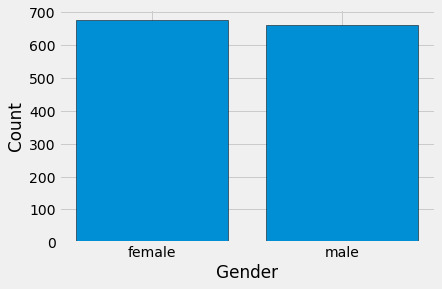

In [8]:
plt.style.use('fivethirtyeight')
count = df['sex'].value_counts()
gender = df['sex'].unique()
plt.bar(gender,count, edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Count")

In [9]:
#df['sex'] = df['sex'].replace(to_replace={'female':0,'male':1})
df['smoker'] = df['smoker'].replace(to_replace={'no':0,'yes':1})

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


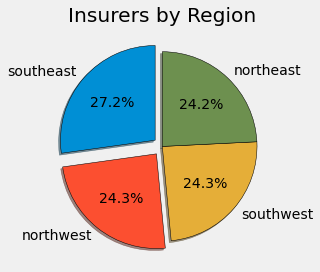

In [11]:
slices = df['region'].value_counts()
labels = df['region'].value_counts().index
explode = [0.1, 0.1, 0,0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Insurers by Region")
plt.tight_layout()
plt.show()

In [12]:
print('Median age -->', math.floor(df['age'].median()))

Median age --> 39


Text(0.5, 1.0, 'Insurance by AgeGroup')

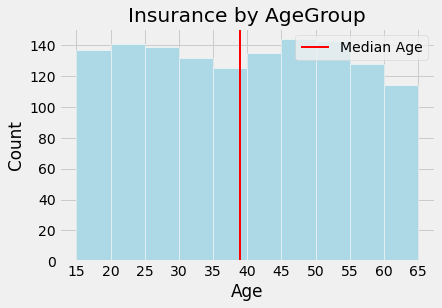

In [13]:
plt.hist(df['age'], bins = range(15, 70, 5), edgecolor = 'white', color = 'lightblue')
plt.xticks(range(15, 70, 5))
med_age = 39
plt.axvline(med_age, color='red', label='Median Age', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Insurance by AgeGroup')

In [14]:
#pd.get_dummies(df['region'],drop_first=True).head()

In [15]:
#df1=pd.get_dummies(df['region'],drop_first=True)
#df = pd.concat([df1,df],axis=1)

In [16]:
df.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
features = ['age','bmi','smoker']
X=df[features]
y=df['charges'] 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
X_test.tail()

,age,bmi,smoker
271,50,34.200,1
695,26,40.185,0
1039,19,27.265,0
323,57,40.945,0
835,42,35.970,0


In [23]:
y_test

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
           ...     
271     42856.83800
695      3201.24515
1039    22493.65964
323     11566.30055
835      7160.33030
Name: charges, Length: 268, dtype: float64

In [24]:
regressor.predict([[28,34.5,1]])

array([30710.34825391])

In [25]:
y_pred=regressor.predict(X_test)

In [26]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
mse

42878142.41825762

In [27]:
regressor.score(X_test,y_test)

0.6942750153885919

In [28]:
regressor.score(X_train,y_train)

0.7598838320471724

In [29]:
regressor.coef_

array([  263.24995844,   338.06601763, 24035.51850319])

In [30]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,263.249958
bmi,338.066018
smoker,24035.518503


**Interpreting the coefficients:**<br>

Holding all other features fixed, a 1 unit increase in bmi is associated with an increase of $338 in price.

In [31]:
from numpy import cov
covariance = cov(df['age'],df['charges'])
print(covariance)

[[1.97401387e+02 5.08748023e+04]
 [5.08748023e+04 1.46652372e+08]]


We see that there is a +ve correlation between the two variables. However, upon training the model, we may find that as the value of one variable increases, the value of the other decreases. This can happen in a multivariate regression model.<br>

**Implementing Regularization Technique**

In [32]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.15) 
RidgeModel.fit(X_train, y_train)
RidgeModel.score(X_test, y_test)

0.6943252291513853

In [33]:
prediction=RidgeModel.predict(X_test)

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4576.3539738490945
MSE: 42871099.90298806


<IPython.core.display.Javascript object>

RMSE: 6547.60260728979


**Using Polynomial Regression**

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_reg = PolynomialFeatures(degree=2)

In [37]:
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [38]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly, y_train)
lin_reg2.score(X_test_poly,y_test)

0.7947499023177662

In [39]:
lin_reg2.predict(poly_reg.transform([[28,34.5,0]]))

array([5257.64322205])

In [40]:
RidgeModel_2 = Ridge(alpha=0.2) 
RidgeModel_2.fit(X_poly, y_train)
RidgeModel_2.score(X_test_poly,y_test)

0.7945867987635247

In [41]:
RidgeModel_2.predict(poly_reg.transform([[18,38.5,1]]))

array([38026.6926797])

In [42]:
prediction=RidgeModel_2.predict(X_test_poly)

**Regression Evaluation Metrics**<br>
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, and we want to minimize them.

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3244.6520865228204
MSE: 28809344.805112604


<IPython.core.display.Javascript object>

RMSE: 5367.433726196589


In [44]:
prediction=lin_reg2.predict(X_test_poly)

In [45]:
def pred(age,bmi,smoker):
    new_data = [[age,bmi,smoker]]
    return (lin_reg2.predict(poly_reg.transform(new_data)))

In [46]:
pred(28,34.5,0)

array([5257.64322205])